In [24]:
# required libraries
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
# reading the csv file 
dataset = pd.read_csv('cleaned_fintech_data.csv')
dataset.head()


,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

In [5]:
# showing all columns we have in our dataset
print('\n Column Names\n')
print(dataset.columns)


 Column Names

Index(['Unnamed: 0', 'created_at', 'source', 'original_text', 'clean_text',
       'sentiment', 'polarity', 'subjectivity', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'screen_count', 'followers_count',
       'friends_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place', 'place_coord_boundaries', 'timestamp'],
      dtype='object')


In [6]:
dataset

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,2805.0,Thu Jun 17 10:21:02 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,"Sentiment(polarity=0.13636363636363635, subjec...",0.13636363636363635,0.45454545454545453,en,0,...,TrixAnabella,65144,644,1064,NaN,NaN,davidbewart,NaN,NaN,2021-06-17 10:21:02+00:00
5617,2806.0,Thu Jun 17 10:21:03 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Idhi me bathuku \nMost Day1 Records In Nizam f...,Idhi bathuku Most Day1 Records In Nizam Non BB...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.5,0.5,in,0,...,Faninexile1,4796,713,227,NaN,NaN,Maheshtarakian1,NaN,NaN,2021-06-17 10:21:03+00:00
5618,2807.0,Thu Jun 17 10:21:08 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,"Sentiment(polarity=0.15416666666666667, subjec...",0.15416666666666667,0.5,en,0,...,acquitaine_,520,365,581,NaN,NaN,siilveon,NaN,deez nuts,2021-06-17 10:21:08+00:00
5619,2808.0,Thu Jun 17 10:21:09 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Manam edi chesina \n\nDaaniki kuda elevation i...,Manam edi chesina Daaniki kuda elevation istad...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,et,0,...,MbGodavari,17010,770,557,NaN,NaN,KonaseemaSSMBFC,NaN,NaN,2021-06-17 10:21:09+00:00


<AxesSubplot:>

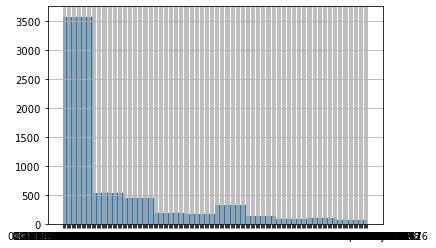

In [7]:
dataset['polarity'].hist()

In [8]:
# checking in dataframe where NUN are located
dataset.isnull().any()

Unnamed: 0                 True
created_at                False
source                    False
original_text             False
clean_text                 True
sentiment                 False
polarity                  False
subjectivity              False
lang                      False
favorite_count            False
retweet_count             False
original_author           False
screen_count              False
followers_count           False
friends_count             False
possibly_sensitive         True
hashtags                   True
user_mentions             False
place                      True
place_coord_boundaries     True
timestamp                 False
dtype: bool

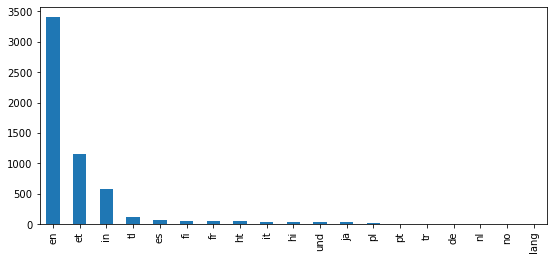

In [9]:
plt.figure(figsize=(20, 4))

plt.subplot(121)
dataset['lang'].value_counts().plot(kind='bar')
# plt.subplot(122)
# cleanTweet['lang'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [10]:
#create new dataframe cleanTweet
cleanTweet=dataset[['clean_text','polarity']]
cleanTweet.head()

,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5


In [11]:
#convert datatype of polarity to numeric.
cleanTweet['polarity']=pd.to_numeric(cleanTweet['polarity'],errors='coerce')

<ipython-input-11-c46b9d726a10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanTweet['polarity']=pd.to_numeric(cleanTweet['polarity'],errors='coerce')


In [12]:
# Write a function text_category that takes a value p and returns, depending on the value of p, a string 'positive', 'negative' or 'neutral'
def text_category (p):
    if(p > 0):
        return "Positive"
    elif(p < 0):
         return "Negative"
    else:
        return "Neutral"
    

In [13]:
# #Apply text_category function
cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)
cleanTweet.head()

<ipython-input-13-7a89688c8786>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)


,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,Positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000,Neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000,Neutral
3,Today World Day Combat Restoring degraded land...,0.250000,Positive
4,Hearing say 's confident vaccines delivered li...,0.500000,Positive


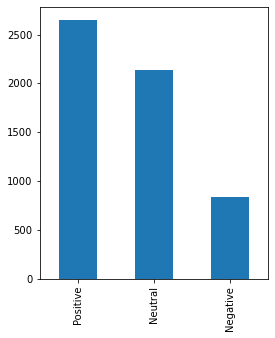

In [14]:
#visualize bar plot
plt.figure(figsize=(9, 5))
plt.subplot(121)
cleanTweet['score'].value_counts().plot(kind='bar')
plt.show()

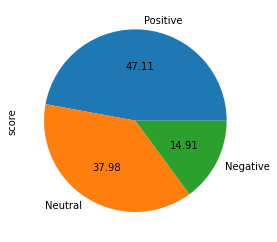

In [15]:
#visualize pie plot
plt.figure(figsize=(9, 5))
plt.subplot(122)
cleanTweet['score'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [16]:
#Drop neutral scores
cleanTweet.drop(cleanTweet[cleanTweet['score']=='Neutral'].index, inplace=True)
cleanTweet=cleanTweet.reset_index(drop=True)
cleanTweet.head()


C:\Users\Germain\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,Positive
1,Today World Day Combat Restoring degraded land...,0.250000,Positive
2,Hearing say 's confident vaccines delivered li...,0.500000,Positive
3,Today World Day Combat Restoring degraded land...,0.250000,Positive
4,Austria `` right '' grid tariffs regulatory re...,0.285714,Positive


In [17]:
#create score map
score_dict={'Positive':1,'Negative':0}
cleanTweet['scoremap']= cleanTweet['score'].map(score_dict)
cleanTweet.head()

,clean_text,polarity,score,scoremap
0,Giving forth life becoming burden Kenya This m...,0.319444,Positive,1
1,Today World Day Combat Restoring degraded land...,0.250000,Positive,1
2,Hearing say 's confident vaccines delivered li...,0.500000,Positive,1
3,Today World Day Combat Restoring degraded land...,0.250000,Positive,1
4,Austria `` right '' grid tariffs regulatory re...,0.285714,Positive,1


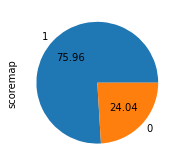

In [18]:
plt.subplot(122)
cleanTweet['scoremap'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [19]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleanTweet['clean_text'], cleanTweet['scoremap'], test_size = 0.20, random_state=1)

In [20]:
#vectorize 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3, 3))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)



In [21]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_cv, y_train)
predictions = clf.predict(X_test_cv)

In [22]:
#Analysis of the performance metrics for each category
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix,classification_report
results = confusion_matrix(y_test, predictions) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predictions)) 
print ('Report : ')
print (classification_report(y_test, predictions))

Confusion Matrix :
[[168   8]
 [  0 522]]
Accuracy Score : 0.9885386819484241
Report : 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       176
           1       0.98      1.00      0.99       522

    accuracy                           0.99       698
   macro avg       0.99      0.98      0.98       698
weighted avg       0.99      0.99      0.99       698

